In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *

## Getting 
Kuzushiji Kanji Dataset

In [24]:
%%capture
!pip install deeplake

In [25]:
import deeplake
ds = deeplake.load("hub://activeloop/kuzushiji-kanji")

\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/kuzushiji-kanji



/

hub://activeloop/kuzushiji-kanji loaded successfully.



In [41]:
ds.summary()

Dataset(path='hub://activeloop/kuzushiji-kanji', read_only=True, tensors=['images', 'labels'])

 tensor      htype          shape         dtype  compression
 -------    -------        -------       -------  ------- 
 images      image     (140424, 64, 64)   uint8    jpeg   
 labels   class_label    (140424, 1)     uint32    None   


In [74]:
image = ds.images[0].numpy()
image.shape, image[20:24, 20:24]

((64, 64),
 array([[  0,   1, 174, 255],
        [  0,  29, 198, 255],
        [ 41, 130, 236, 251],
        [126, 229, 250, 255]], dtype=uint8))

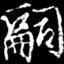

In [75]:
img = Image.fromarray(image)
img

In [79]:
diff = np.full(image.shape, 255, dtype=np.uint8) - image

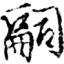

In [81]:
Image.fromarray(diff)

## Formatting Chineese Dataset

In [3]:
path = Path('.').cwd()/'dset'/'handwritten_chinese_stroke_2021'/'train2021'

In [7]:
mandarin_train_1 = [file for file in os.listdir(path) if 'Zone.Identifier' not in file]
len(mandarin_train_1)

2013

In [15]:
# Creating a datablock
language = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(200, min_scale = 1), batch_tfms = aug_transforms(mult = 1.1))

In [16]:
dls = language.dataloaders(path, bs = 10)

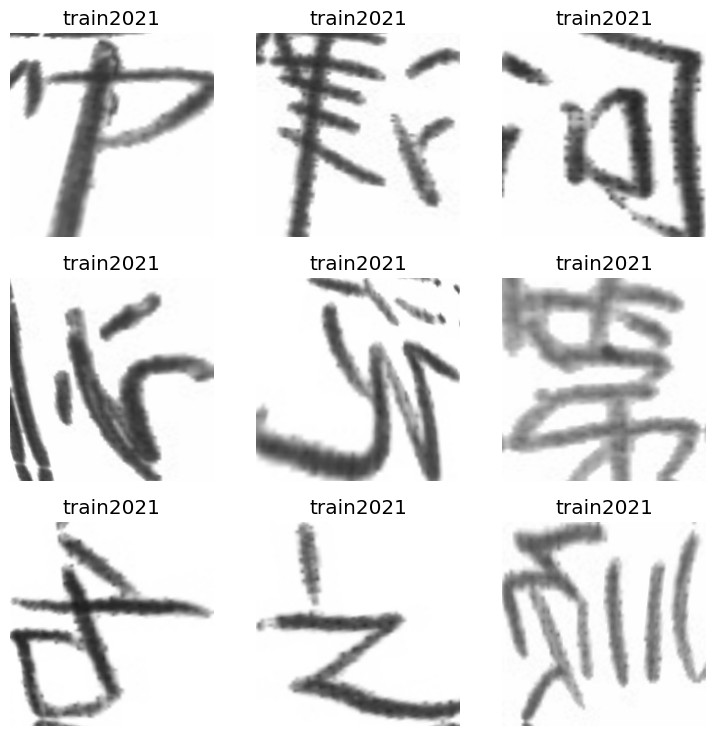

In [17]:
dls.train.show_batch()